# Step #1 Loading the Data

In [36]:
# Work in progress!
# A tutorial for this file will soon be available at www.relataly.com
# Tested with Python 3.8.8, Matplotlib 3.5, Scikit-learn 0.24.1, Seaborn 0.11.1, numpy 1.19.5, plotly 4.1.1, cufflinks 0.17.3

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from math import log, exp 
from datetime import date, timedelta, datetime
import seaborn as sns
sns.set_style('white', {'axes.spines.right': False, 'axes.spines.top': False})
from scipy.stats import norm

# Setting the timeframe for the data extraction
end_date =  date.today().strftime("%Y-%m-%d")
start_date = '2010-01-01'

# Getting NASDAQ quotes
stockname = 'Apple'
symbol = 'AAPL'

# You can either use webreader or yfinance to load the data from yahoo finance
# import pandas_datareader as webreader
# df = webreader.DataReader(symbol, start=start_date, end=end_date, data_source="yahoo")

import yfinance as yf #Alternative package if webreader does not work: pip install yfinance
df = yf.download(symbol, start=start_date, end=end_date)

# Quick overview of dataset
print(df.head())

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.505281  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.516528  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.412873  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.401018  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.443573  447610800


In [37]:
highest_swing = -1
lowest_swing = -1
for i in range(1,df.shape[0]-1):
    if df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] and (highest_swing == -1 or df['High'][i] > df['High'][highest_swing]):
        highest_swing = i
    if df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] and (lowest_swing == -1 or df['Low'][i] < df['Low'][lowest_swing]):
        lowest_swing = i

ratios = [0,0.236, 0.382, 0.5 , 0.618, 0.786,1]
colors = ["black","r","g","b","cyan","magenta","yellow"]
levels = []
max_level = df['High'][highest_swing]
min_level = df['Low'][lowest_swing]
for ratio in ratios:
    if highest_swing > lowest_swing: # Uptrend
        levels.append(max_level - (max_level-min_level)*ratio)
    else: # Downtrend
        levels.append(min_level + (max_level-min_level)*ratio)
print(levels)


[182.94000244140625, 141.3696975955963, 115.65247510623932, 94.86732268333435, 74.08217026042938, 44.48974986171723, 6.794642925262451]


In [56]:
levels[::1]

[6.794642925262451,
 44.48974986171723,
 74.08217026042938,
 94.86732268333435,
 115.65247510623932,
 141.3696975955963,
 182.94000244140625]

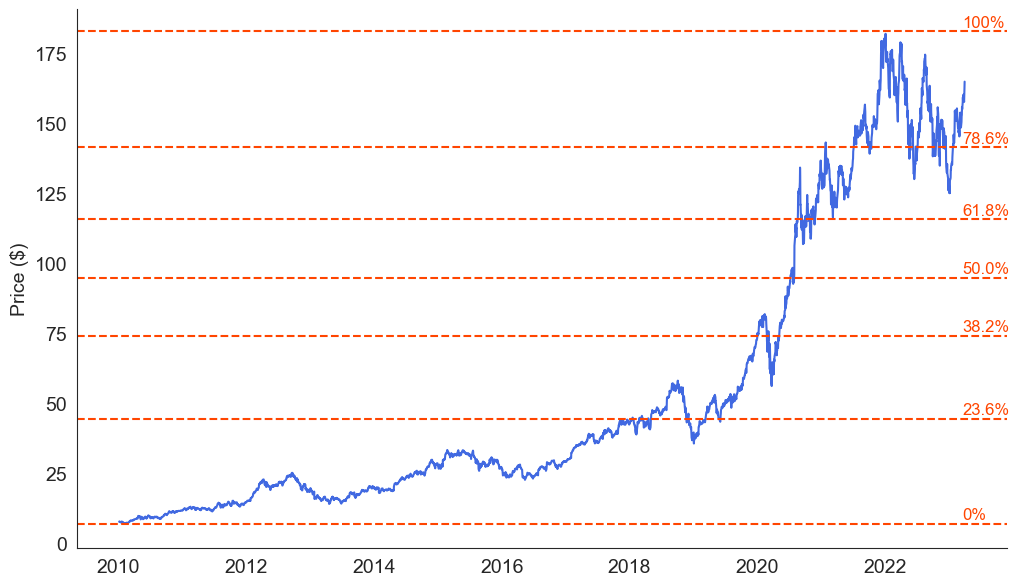

In [59]:
fig, ax = plt.subplots()
sns.lineplot(data=df, x=df.index, y='Close', color='royalblue')
for i, level in enumerate(levels[::1]):
    ax.axhline(y=level, color='orangered', linestyle="dashed")
    # add text labels
    plt.text(x=df.index[max(highest_swing +300, lowest_swing)], y=level+1.5, s=str(round(ratios[i]*100, 2)) + '%', color='orangered', fontsize=12)
ax.set_ylabel('Price ($)')
ax.set_xlabel(None)
plt.show()